# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
age= [17,51,27,21,36,48,19,26,54,30]

tardies=[10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': age, 'Tardies': tardies})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

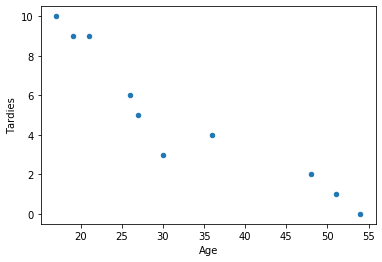

In [3]:
# Your code here.
student_data.plot.scatter(x = 'Age', y = 'Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
#Yes I can see the a trend, from the scatter plot above I'm able to see that theres a negative linear relatioship between
#Age and being late, this shows that the older one is the more on time will be!

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
#correlation:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
#covariance:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
"""
The Covarience measures the directional relationship between two variables, meaning:

-A positive covarience means that both variables move together.
-A negative covarience means they move inversely.

The correlation measures the sternght of the linear relationship between two variables, meaning:

-A positive correlation is a relationship between two variables, where they both move in the same direction.
    Example: The more time you study the better grade you get.
-A negative correlation is a relationship between two variables, where they move in different directions.
    Example: When you buy a product the stock will go down.
    
The correlation value of -0.939163 tells us that those two variables are strongly correlated, almost perfectly negative
correlated.(the closer you get to 1 the more "perfect")

So this means if the age increases the time one is late to class will be lower!

"""

Plot your regression model on your scatter plot.

In [8]:
# Your code here.
x = student_data['Age']
y = student_data['Tardies']

results = stats.linregress(x, y)

results

#I used the Linear Regression since the data had a very strong linear correlation, having done this the result is
#a LinregressResult outcome

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

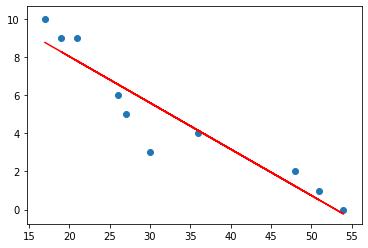

In [10]:
regression_line = results[0]*x + results[1]


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
After analysing all the data, I think that I can say with some degree of sertanty that age is good indicator of how
late someone will be, this based on the fact that these two variables have a very strong negative relationship
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
data = pd.read_csv('vehicles.csv')

#data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 
data = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

data.corr()

"""
I think the most important data will be between Fuel Barrels/Year, Combined MPG and Fuel Cost/Year since they have a
clear impact in each other.
"""

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
x = data[['Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]

y = data['CO2 Emission Grams/Mile']

model = sm.OLS(y,x).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
# Your response here. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          8.760e+06
Date:                     Fri, 31 Jul 2020   Prob (F-statistic):                        0.00
Time:                             17:05:41   Log-Likelihood:                     -1.5515e+05
No. Observations:                    35952   AIC:                                  3.103e+05
Df Residuals:                        35949   BIC:                                  3.103e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    22.4724      0.051    437.446      0.000      22.372      22.573
Combined MPG          0.1052      0.010     10.622      0.000       0.086       0.125
Fuel Cost/Year        0.0408      0.000     86.909      0.000       0.040       0.042
==============================================================================
Omnibus:                    79210.856   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        470089111.722
Skew:                          20.397   Prob(JB):                         0.00
Kurtosis:                     561.701   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [16]:
# Your code here.
party_data = pd.DataFrame({'People Invited': [1,3,4,6,8,9,11,14], 'Attendees': [1,2,4,4,5,7,8,13]})
#Define the people who received the invite and the ones that attended


party_data['Number of people who did not attend'] = party_data['People Invited'] - party_data['Attendees']
#calculate the difference between the people invited and the attendees

party_data

,People Invited,Attendees,Number of people who did not attend
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

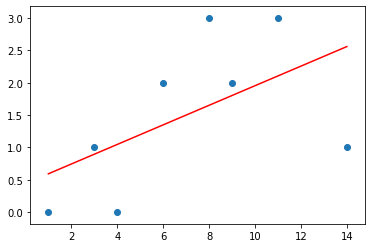

In [18]:
# Your code here.
x = party_data['People Invited']
y = party_data['Number of people who did not attend']
results = stats.linregress(x, y)

regression_line = results[0]*x + results[1]

plt.plot(x, regression_line, c = 'red')
plt.scatter(x, y)

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
"""
Ploting this allow us to see that there is a some positive correlation since the more invitations we give the more
attendees there will be.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

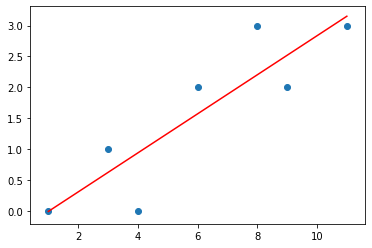

In [19]:
# Your response here. 
party_data = party_data.drop(party_data.tail(1).index)

x = party_data['People Invited']
y = party_data['Number of people who did not attend']
results = stats.linregress(x, y)

regression_line = results[0]*x + results[1]

plt.plot(x, regression_line, c = 'red')
plt.scatter(x, y)

plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
By removing the outliers our data becomes more clean and clear, now the relation between these two variables
is even higher.
"""